In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gas_df = pd.read_csv('gas_prices_state.csv')

In [3]:
states = {'CA':'California', 'CO':'Colorado', 'FL':'Florida', 'MA':'Massachusetts', 'MN':'Minnesota', 'NY':'New York',
         'OH':'Ohio', 'TX':'Texas', 'WA':'Washington'}

In [4]:
gas_df = gas_df[:-1]
gas_df= gas_df[(gas_df.index > 35) & (gas_df.index < 234)]
gas_df = gas_df.rename(columns = lambda x: x.split(' ')[0])
gas_df = gas_df.rename(columns={'New':'New York'})
gas_df

,Date,California,Colorado,Florida,Massachusetts,Minnesota,New York,Ohio,Texas,Washington
36,Jun-03,1.809,1.513,1.512,1.534,1.484,1.610,1.481,1.416,1.607
37,Jul-03,1.789,1.522,1.561,1.553,1.533,1.633,1.509,1.458,1.639
38,Aug-03,1.913,1.636,1.654,1.656,1.666,1.729,1.639,1.540,1.798
39,Sep-03,2.068,1.696,1.679,1.821,1.604,1.894,1.658,1.549,1.894
40,Oct-03,1.839,1.560,1.575,1.724,1.562,1.806,1.572,1.447,1.677
...,...,...,...,...,...,...,...,...,...,...
229,Jul-19,3.668,2.733,2.641,2.779,2.622,2.868,2.754,2.520,3.242
230,Aug-19,3.555,2.608,2.451,2.746,2.572,2.822,2.631,2.405,3.170
231,Sep-19,3.687,2.692,2.472,2.661,2.533,2.728,2.595,2.358,3.134
232,Oct-19,4.116,2.822,2.460,2.638,2.520,2.676,2.563,2.324,3.294


In [5]:
print(gas_df.shape)

(198, 10)


In [6]:
transit_df = pd.read_csv('upt.csv', thousands=',')
transit_df = transit_df.fillna(value=0)
transit_df = transit_df[0:2159:]
transit_df = transit_df[transit_df['UZA Name']!='Non-UZA']
transit_df['State'] = transit_df['UZA Name'].map(lambda x: x.split(', ')[1].split('-')[0])
transit_df.loc[transit_df.Agency=='New Jersey Transit Corporation', 'State'] = 'NJ'
transit_df.loc[transit_df.Agency=='Johnson County Kansas, aka: Johnson County Transit', 'State'] = 'KS'
transit_df.loc[transit_df.Agency=='Delaware Transit Corporation','State'] = 'DE'

In [7]:
col_names = transit_df.columns[26:-1]
col_names

Index(['JUN03', 'JUL03', 'AUG03', 'SEP03', 'OCT03', 'NOV03', 'DEC03', 'JAN04',
       'FEB04', 'MAR04',
       ...
       'FEB19', 'MAR19', 'APR19', 'MAY19', 'JUN19', 'JUL19', 'AUG19', 'SEP19',
       'OCT19', 'NOV19'],
      dtype='object', length=198)

In [8]:
print(transit_df.shape)
transit_df.head()

(2154, 225)


,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,UZA Name,Modes,TOS,JAN02,...,MAR19,APR19,MAY19,JUN19,JUL19,AUG19,SEP19,OCT19,NOV19,State
0,1.0,0001,King County Department of Transportation - Met...,Active,Full Reporter,14.0,"Seattle, WA",DR,PT,135144.0,...,76292.0,78730.0,80718.0,74590.0,79512.0,79704.0,74525.0,83809.0,74197.0,WA
1,1.0,0001,King County Department of Transportation - Met...,Active,Full Reporter,14.0,"Seattle, WA",DT,PT,0.0,...,15343.0,16704.0,16241.0,14544.0,14051.0,13064.0,15666.0,19934.0,15509.0,WA
2,1.0,0001,King County Department of Transportation,Active,Full Reporter,14.0,"Seattle, WA",FB,DO,0.0,...,56148.0,58572.0,69194.0,74257.0,90079.0,67308.0,62058.0,56795.0,34259.0,WA
3,1.0,0001,King County Department of Transportation - Met...,Active,Full Reporter,14.0,"Seattle, WA",LR,DO,12990.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WA
4,1.0,0001,King County Department of Transportation - Met...,Active,Full Reporter,14.0,"Seattle, WA",MB,DO,6045861.0,...,8602940.0,8890346.0,9188147.0,8607030.0,8824138.0,8696555.0,8398242.0,9546885.0,8444918.0,WA


In [9]:
modes = ['HR', 'LR', 'CR', 'MB', 'TB', 'CB', 'RB']
bus_modes = ['MB', 'TB', 'CB', 'RB']

def get_tot_for_state(state_abbr):
    city = transit_df[transit_df['State']==state_abbr]
    city = city.iloc[:,9:]
    city = city.dropna(how='all')
    city = city.fillna(value=0)
    city_sum = city.sum(axis=0)
    
    return city_sum[17:-1]

def get_mode_for_state(state_abbr, mode):
    city = transit_df[(transit_df['State']==state_abbr) & (transit_df['Modes']==mode)]
    city = city.iloc[:,9:]
    city = city.dropna(how='all')
    city = city.fillna(value=0)
    city_sum = city.sum(axis=0)
    
    return city_sum[17:-1]
    

In [10]:
def get_city_df(state_abbr):
    temp_df = pd.DataFrame(columns=['month','trips','gprice','state'])
    
    state_name = states[state_abbr]
    temp_df['trips'] = get_tot_for_state(state_abbr).values
    temp_df['gprice'] = gas_df[state_name].values
    temp_df['month'] = col_names
    
    temp_df['state'] = state_abbr
    
    return temp_df

def get_state_mode_df(state_abbr):
    temp_df = pd.DataFrame(columns=['month', 'HR', 'LR', 'CR', 'Bus', 'state'])
    state_name = states[state_abbr]
    temp_df['gprice'] = gas_df[state_name].values
    temp_df['month'] = col_names
    temp_df['state'] = state_abbr
    temp_df['Bus'] = 0.
    
    for mode in modes:
        mode_tot = get_mode_for_state(state_abbr, mode).values
        if mode in bus_modes:
            tmp = temp_df['Bus']
            temp_df['Bus'] = tmp + mode_tot
        else:
            temp_df[mode] = mode_tot
            
    return temp_df
    

In [11]:
get_city_df('FL')

,month,trips,gprice,state
0,JUN03,1.59318e+07,1.512,FL
1,JUL03,1.69098e+07,1.561,FL
2,AUG03,1.68028e+07,1.654,FL
3,SEP03,1.73151e+07,1.679,FL
4,OCT03,1.87253e+07,1.575,FL
...,...,...,...,...
193,JUL19,1.74272e+07,2.641,FL
194,AUG19,1.81061e+07,2.451,FL
195,SEP19,1.83753e+07,2.472,FL
196,OCT19,1.98915e+07,2.460,FL


In [12]:
main_df = pd.DataFrame(columns=['month','trips','gprice','state'])

for k in states:
    state_df = get_city_df(k)
    main_df = main_df.append(state_df)
    
main_df['year'] = main_df['month'].map(lambda x: int('20'+x[3:]))

main_df

,month,trips,gprice,state,year
0,JUN03,1.06884e+08,1.809,CA,2003
1,JUL03,1.1183e+08,1.789,CA,2003
2,AUG03,1.12419e+08,1.913,CA,2003
3,SEP03,1.11123e+08,2.068,CA,2003
4,OCT03,9.48002e+07,1.839,CA,2003
...,...,...,...,...,...
193,JUL19,2.24698e+07,3.242,WA,2019
194,AUG19,2.23713e+07,3.170,WA,2019
195,SEP19,2.07945e+07,3.134,WA,2019
196,OCT19,2.33052e+07,3.294,WA,2019


In [13]:
main_df.to_csv('combined_state_data.csv', index=False)

In [14]:
mode_df = pd.DataFrame(columns=['month', 'HR', 'LR', 'CR', 'Bus', 'state'])

for k in states:
    state_mode_df = get_state_mode_df(k)
    mode_df = mode_df.append(state_mode_df)
    
mode_df['year'] = mode_df['month'].map(lambda x: int('20'+x[3:]))

mode_df.to_csv('combined_state_mode_data.csv', index=False)

C:\Users\Jack Graham\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [15]:
## parallel trends check between Minnesota/other states

minn_df = main_df[main_df['state']=='MN']
minn_trips = minn_df['trips'].values

ca_df = main_df[main_df['state']=='CA']
other_trips = ca_df['trips'].values

for k in states:
    if k != 'MN'and k != 'CA':
        state_df = main_df[main_df['state']==k]
        state_trips = state_df['trips'].values
        other_trips += state_trips

other_trips = other_trips/9.
len(other_trips)

198

In [16]:
minn_pre = np.asarray([float(x) for x in minn_trips[0:64]])
xm = np.asarray([float(x) for x in np.arange(0.,64,1)])
m,b = np.polyfit(xm, minn_pre, 1)

other_pre = np.asarray([float(x) for x in other_trips[0:64]])
xo = np.asarray([float(x) for x in np.arange(0.,64,1)])
mo, bo = np.polyfit(xo, other_pre, 1)

print(m, mo)

49024.58450091577 200333.47665852678


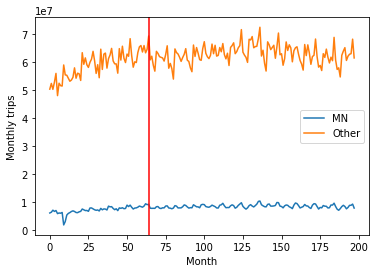

In [17]:
#x_vals = main_df['month'].values[0:198]
x_vals = np.arange(0,198, 1)

plt.plot(x_vals, minn_trips, label='MN')
plt.plot(x_vals, other_trips, label='Other')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Monthly trips')
plt.axvline(64, color='red')
plt.show()

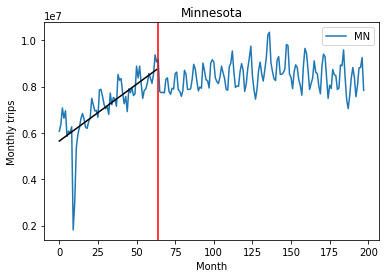

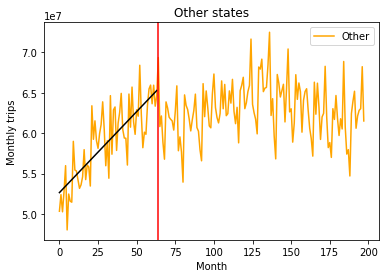

In [18]:
plt.plot(x_vals, minn_trips, label='MN')
plt.plot(xm, m*xm+b, color='black')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Monthly trips')
plt.axvline(64, color='red')
plt.title("Minnesota")
plt.savefig('MNtrends.png')
plt.show()

plt.plot(x_vals, other_trips, label='Other', color='orange')
plt.plot(xo, mo*xo+bo, color='black')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Monthly trips')
plt.title("Other states")
plt.axvline(64, color='red')
plt.savefig('othertrends.png')
plt.show()

In [19]:
pop_df = pd.read_csv('state_month_controls.csv', thousands=',')
pop_df = pop_df[['Total Population', 'state', 'trips']]

pop_df['trip_pc'] = pop_df['trips']/pop_df['Total Population']

statetrips = dict.fromkeys(states.keys(), None)
for s in statetrips:
    state_df = pop_df[pop_df['state']==s]
    avg_trips = np.mean(np.asarray(state_df['trip_pc']))
    statetrips[s]= avg_trips
    
statetrips

{'CA': 3.084577117219752,
 'CO': 1.7289499467356135,
 'FL': 1.1449860734252708,
 'MA': 5.212315145547388,
 'MN': 1.560523822978948,
 'NY': 16.929915954846283,
 'OH': 0.8486271194639964,
 'TX': 0.9097106282629367,
 'WA': 2.8020258209583115}

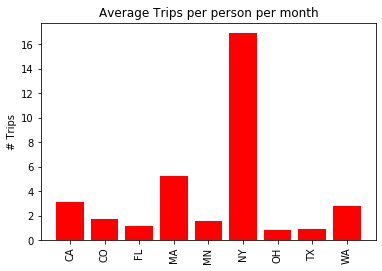

In [23]:
plt.bar(statetrips.keys(), statetrips.values(), color='red')
plt.xticks(rotation=90)
plt.title('Average Trips per person per month')
plt.ylabel('# Trips')
plt.savefig('stateavgtrips.png')
plt.show()